In [1]:
import numpy as np
import pandas as pd

##### 1

##### 2

##### 3

##### 4

An important thing to understand is that with linked lists and binary trees, you are literally given objects in memory that contain data and pointers. With graphs, the graph doesn't literally exist in memory.

In fact, only the "idea" of the graph exists. The input will give you some information about it, and it's up to you to figure out how to represent and traverse the graph with code.

Many times, the nodes of a graph will be labeled from 0 to n - 1. The problem statement may or may not explicitly state the input is a graph. Sometimes there might be a story, and you need to determine that the input is a graph. For example, "there are n cities labeled from 0 to n - 1". You can treat each city as a node and each city has a unique label.

With binary trees, traversal was easy because at any given node, we only needed to reference node.left and node.right. This allowed us to focus only on the traversal (with DFS or BFS). With graphs, a node can have any number of neighbors. Before we start our traversal, we usually need to do some work to make sure that for any given node, we can immediately access all the neighbors of said node.

#### First input format: array of edges



In this input format, the input will be a 2D array. Each element of the array will be in the form [x, y], 
which indicates that there is an edge between x and y. The problem may have a story for these edges - using the cities example,
the story would be something like "[x, y] means there is a highway connecting city x and city y".

So, why can't we immediately start traversal? Let's say that we want to start a DFS from node 0 (sometimes the problem will state which node you should start from, sometimes you will need to figure this out yourself). When we're at node 0, how do we find the neighbors? We would need to iterate over the entire input to find all edges that include 0. When we move to a neighbor node, we would need to iterate over the entire input again to find all the neighbors of that node.

At every node, we would need to iterate over the entire input to find the neighbors. This is very slow!

Before starting the traversal, we can pre-process the input so that we can easily find all neighbors of any given node. Ideally, you want a data structure where you can give node as an argument and be returned a list of neighbors. The easiest way to accomplish this is using a hash map.

Let's say you had a hash map graph that mapped integers to lists of integers. We can iterate over the input and for each [x, y] pair, we can put y in the list associated with graph[x]. If the edges are undirected, we will also need to put x in the list associated with graph[y]. After building this hash map, we can do graph[0] and immediately have all the neighbors of node 0.


A good analogy for this: imagine you're on Facebook and you want to see a list of all your friends. However, the Facebook engineers decided to keep their graph in the form of an array of edges! You would need to look at every single connection in the world (which is likely in the hundreds of billions if not trillions) and find the connections that involve you. However, if the graph is built beforehand, you can easily just click the friends tab on your profile to see only your friends.

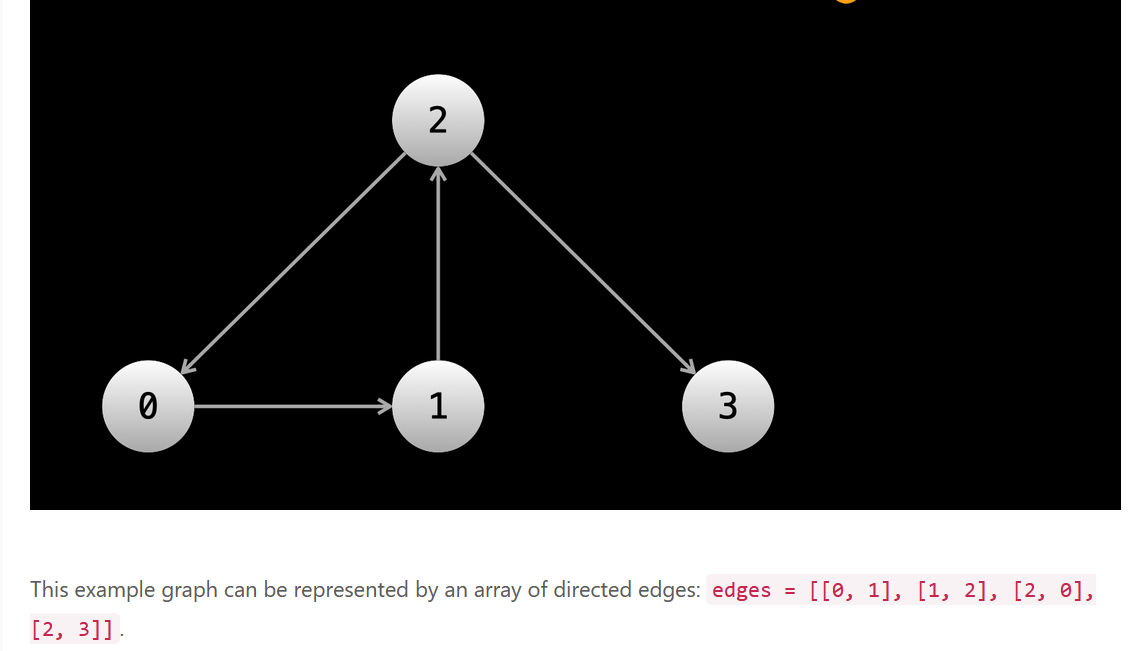

In [2]:
from collections import defaultdict
edges = [[0, 1], [1, 2], [2, 0], [2, 3]]

def build_graph(edges):
    graph = defaultdict(list)
    for x, y in edges:
        graph[x].append(y)
        # graph[y].append(x)
        # uncomment the above line if the graph is undirected
    
    return graph

build_graph(edges)

defaultdict(list, {0: [1], 1: [2], 2: [0, 3]})

#### Second input format: adjacency list

In an adjacency list, the nodes will be numbered from 0 to n - 1. The input will be a 2D integer array, let's call it graph. graph[i] will be a list of all the outgoing edges from the ith node.

The graph in the image above can be represented by the adjacency list graph = [[1], [2], [0, 3], []].

Notice that with this input, we can already access all the neighbors of any given node. We don't need to do any pre-processing! This makes an adjacency list the most convenient format. If we want all the neighbors of node 6, we just check graph[6].

#### Third input format: adjacency matrix

The next format is an adjacency matrix. Once again, the nodes will be numbered from 0 to n - 1. You will be given a 2D matrix of size n x n, let's call it graph. If graph[i][j] == 1, that means there is an outgoing edge from node i to node j. For example:

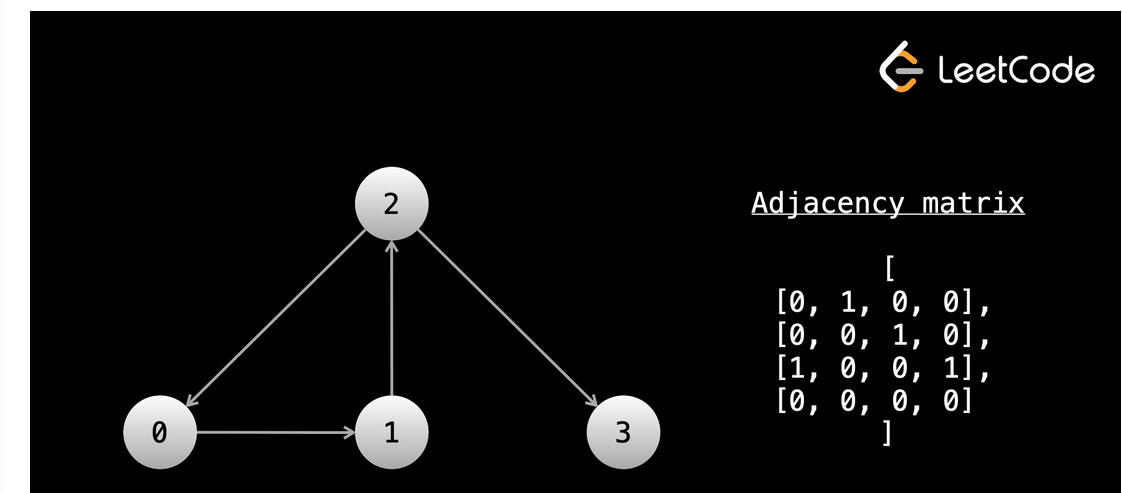

When given this format, you have two options. During the traversal, at any given node you can iterate over graph[node], and if graph[node][i] == 1, then you know that node i is a neighbor. Alternatively, you can pre-process the graph as we did with an array of edges. Build a hash map and then iterate over the entire graph. If graph[i][j] == 1, then put j in the list associated with graph[i]. This way, when performing the traversal, you will not need to iterate n times at every node to find the neighbors. This is especially useful when nodes have only a few neighbors and n is large.

Both of these approaches will have a time complexity of O(n2)

#### Last input format: matrix

The last format we'll talk about is more subtle but very common. The input will be a 2D matrix and the problem will describe a story. Each square will represent something, and the squares will be connected in some way. For example, "Each square of the matrix is a village. Villages trade with their neighboring villages, which are the villages directly above, to the left, to the right, or below them."

In this case, each square (row, col) of the matrix is a node, and the neighbors are (row - 1, col), (row, col - 1), (row + 1, col), (row, col + 1) (if in bounds).

Unlike other input formats, the nodes in these graphs are not numbered 0 until n. Instead, each element in the matrix represents a node. The edges are determined by the problem description, not the input. In the example given above, the problem description states that villages trade with those directly adjacent to them. Thus, the edges are those within 1 square. You will need to carefully think about the problem to understand these kinds of graphs.

#### Code differences between graphs and trees

There are a few big differences between solving graph problems and solving binary tree problems. While a binary tree has a root node to start traversal from, a graph does not always have an obvious "start" point.

For a binary tree, we are given objects for the nodes, and each node has a pointer to its children. In a graph, we might need to convert the input into a hash map first. When traversing a tree, we refer to node.left and node.right at each node. When traversing a graph, we will need to use a for loop to iterate over the neighbors of the current node, since a node could have any number of neighbors.

Implementation of DFS for graphs is similar to implementation for trees. Doing it recursively follows the same format: check for the base case, recursively call on all neighbors, do some logic to calculate the answer, and return the answer. You can also do it iteratively using a stack.

In any undirected graph or a directed graph with cycles, implementing DFS the same way we did with binary trees will result in an infinite cycle (remember linked list cycles? Imagine having your code walk in a circle forever!). Like with trees, in most graph questions, we only need to (and want to) visit each node once. To prevent cycles and unnecessarily visiting a node more than once, we can use a set seen. Before we visit a node, we first check if the node is in seen. If it isn't, we add it to seen before visiting it. This allows us to only visit each node once in O(1) time because adding and checking for existence in a set takes constant time.

#### Example 1:547.(Adjacency Matrix) Number of Provinces

In [5]:
# There are n cities. A province is a group of directly or indirectly connected cities and no other cities 
# outside of the group. You are given an n x n matrix isConnected where 
# isConnected[i][j] = isConnected[j][i] = 1 if the ith city and the jth city are directly connected, 
# and isConnected[i][j] = 0 otherwise. Return the total number of provinces.


In [6]:
# For convenience, we can convert the adjacency matrix to a hash map 
# that maps nodes to an array of their neighbors before starting.

In [8]:
#Step 1: Build Hashmap
#Step 2: Create a seen set to terminate dfs function
#Step 3: Build DFS [for neighbor in graph[node], if neighbor not in seen.....do something, 
#recursive setup(only if neighbor is not seen so this acts as a termination set)]
#Step 4: Increment on ans 

from collections import defaultdict

class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        
        #here dfs function is just adding all connected nodes to seen at one complete recursive iteration
        def dfs(node):
            for neighbor in graph[node]:
                # the next 2 lines are needed to prevent cycles
                if neighbor not in seen:
                    seen.add(neighbor)
                    dfs(neighbor)
        
        # build the graph, undirected in this case
        n = len(isConnected)
        graph = defaultdict(list)
        
        for i in range(n):
            #upper triangular matrix of undirected adjacency matrix used to build hashmap  
            for j in range(i + 1, n):
                if isConnected[i][j]:
                    graph[i].append(j)
                    graph[j].append(i)
        
        seen = set()
        ans = 0
        
        for i in range(n):
            if i not in seen:
                # add all nodes of a connected component to the set
                ans += 1
                seen.add(i)
                dfs(i)
        
        return ans

In [12]:
#Ex1 : 
# isConnected = [[1,1,0],[1,1,0],[0,0,1]]
# output = 2

# Ex 3: isConnected =[[1,0,0],[0,1,0],[0,0,1]]
# output = 3

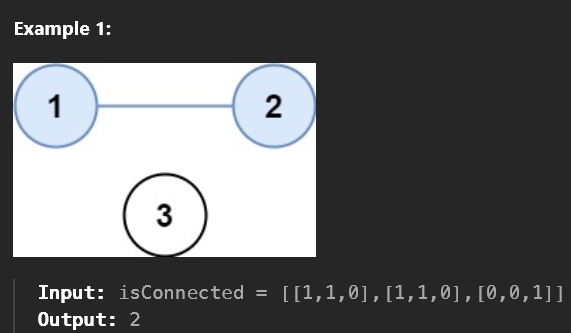

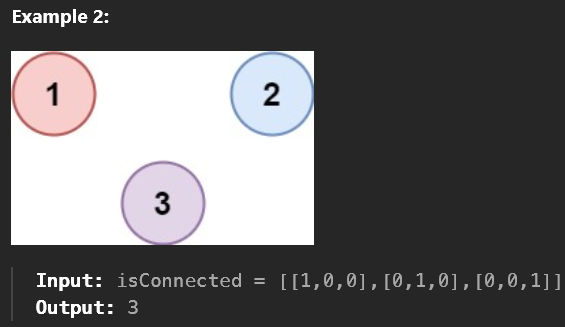

The time complexity of DFS on a graph is slightly different than when it is on a binary tree. With binary tree questions, we argued that each node is visited at most once, and each visit cost O(1). With graphs, we also only visit each node at most once, but the work is not necessarily O(1), because there is a for loop that iterates over the node's neighbors.

The reason visits were O(1) in a binary tree is because a node could have at most 2 children/neighbors, so we didn't need a loop. We just referenced node.left and node.right. With a graph, a node could have any amount of neighbors, so we need a non-constant loop.

As such, the time complexity for DFS on graphs is usually O(n+e), where n is the number of nodes and e is the number of edges. In the worst-case scenario where every node is connected with every other node, e = nC2.

Each node is visited only once
We iterate over a node's edges only when we are visiting that node
Because we can only visit a node once, a node's edges are only iterated over once
Therefore, all edges are iterated over only once, which costs O(e)

This is similar to the argument we made in the sliding window article that justified an O(n) time complexity despite the nested while loop. The nested while loop could only iterate n times across the entire algorithm. Here, the for loop inside the function iterates e times total across the entire algorithm.

Technically in this problem, the time complexity is O(n2) because the input is given as an adjacency matrix, so we always need O(n2) to build the hash map. The e is dominated by n2 (because O(e<n2)), so it can be ignored.


#### Example 2: 200. (Matrix) Number of Islands

In [13]:
# Given a m x n 2D binary grid which represents a map of 1 (land) and 0 (water), return the number of islands.
# An island is surrounded by water and is formed by connecting adjacent land cells horizontally or vertically.



It seems this problem is very similar to the previous one. In fact, it is the exact same problem (find the number of connected components in an undirected graph), the format of the graph is just different. Let's use the same algorithm, but implemented according to this new format.


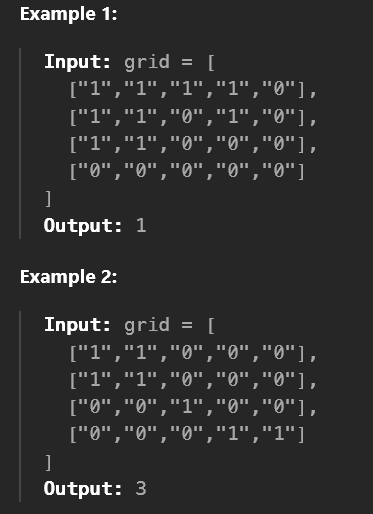

In [ ]:
# Step 1: set nested for loops to iterate across r rows and along n columns 
# and check if row,col is 1 and not in seen, increment ans, add in seen then go to all its neighbor in dfs
# for each node use directions to get all neighbors, check if neighbors are valid row,col in mxn space and is land
# for all valid neighbors and neighbors not in seen add to seen and do recursive set p for neighbors of neighbors


class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        
        def valid(row, col):
            return 0 <= row < m and 0 <= col < n and grid[row][col] == "1"
        
        
        #here dfs function is just adding all connected nodes to seen at one complete recursive iteration
        def dfs(row, col):
            for dx, dy in directions:
                
                #notice why are we adding dy to row and dx to col
                next_row, next_col = row + dy, col + dx
                
                #very important step to terminate recursion
                if valid(next_row, next_col) and (next_row, next_col) not in seen:
                    seen.add((next_row, next_col))
                    dfs(next_row, next_col)
        
        
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        
        seen = set()
        ans = 0
        
        m = len(grid)
        n = len(grid[0])
        
        for row in range(m):
            for col in range(n):
                #if you dont add grid[row][col] == "1" then ans = mxn
                if grid[row][col] == "1" and (row, col) not in seen:
                    ans += 1
                    seen.add((row, col))
                    dfs(row, col)
        
        return ans

Some code differences: we only care about squares whose value is "1" (land). We can define a helper function valid that first checks if a given (row, col) is in bounds, and then checks if it is land. We can also declare an array directions that makes iterating over the 4 neighbors cleaner (this is a very common practice).

Note: we can avoid using the set here by modifying the input. The point of the set is to avoid visiting the same square multiple times. We only visit squares with values "1", so instead of putting a square in a set, we could just change that square's value to "0". However, some interviewers may not want you to modify the input (especially if it is something passed by reference like an array).

We said before that DFS on a graph has a time complexity of O(nodes+edges).This was because we didn't know how many edges a given node could have. However, here the problem explicitly defines that a node can have (at most) 4 edges. Therefore, the work done at each node is once again O(1), and since we are only visiting each node once, the time complexity is equal to the number of nodes, which is O(m⋅n).

#### Example 3: 1466. (Array of edges) Reorder Routes to Make All Paths Lead to the City Zero

In [14]:
# There are n cities numbered from 0 to n - 1 and n - 1 roads such that there is only one way to 
# travel between two different cities. Roads are represented by connections 
# where connections[i] = [x, y] represents a road from city x to city y. The edges are directed. 
# You need to swap the direction of some edges so that every city can reach city 0. 
# Return the minimum number of swaps needed.


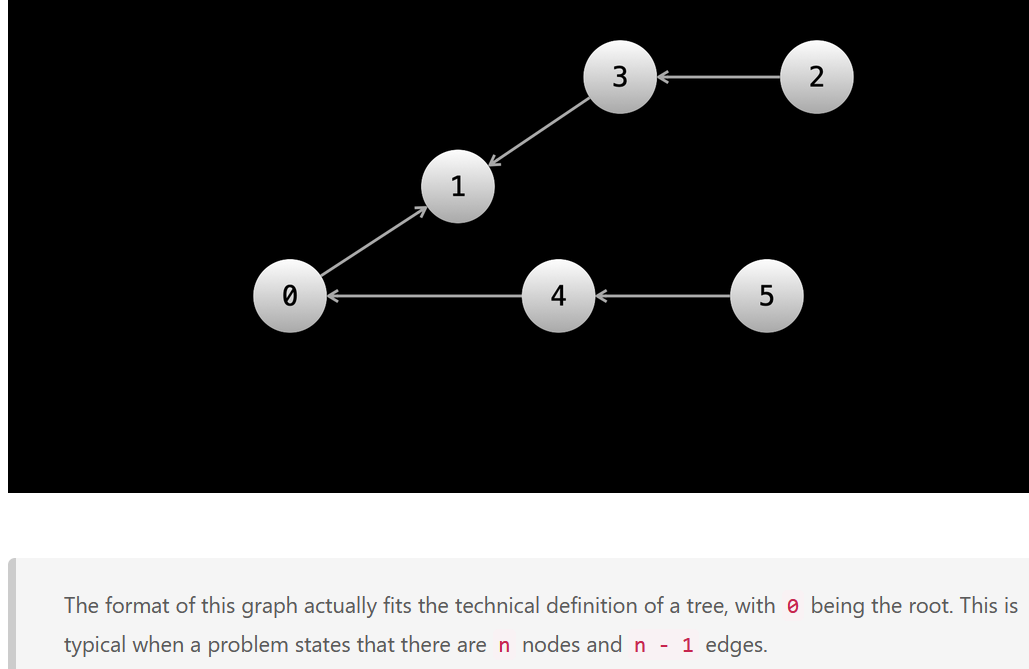

Here, we have a directed graph given as an array of edges. What edges do we need to swap? The problem states that there is only one way to travel between two different cities. We want every city to be able to reach 0, and because there is only one road between cities, all roads must be directed towards 0. This means we can traverse away from 0, and anytime we see that an edge is pointing away from 0, we know we need to swap it.

Although the graph is a directed graph, let's convert it into an undirected one so that we can reach all nodes from 0. Then, we can do a DFS starting at 0. Because our traversal direction is away from 0, at every node, every traversal to a neighbor that hasn't been visited will be away from 0. Therefore, if (node, neighbor) is in connections, we know we need to swap that road. To have fast O(1) checking for if a given edge is in connections, we can put the original directed edges in a set roads.

To summarize: we treat the graph as undirected just so that we can do a DFS starting at 0. During this DFS, every traversal we do is away from 0, so when we see an edge that we are crossing (node, neighbor) is in connections, we know we need to swap it (increment the answer).

In [ ]:
# Step 1: Create a hashmap, have existing roads/edges in a variable
#Step 2: Create DFS, this will start at 0 node and check for all neighbors and their neighbors,
# set up to count in recursive set up.

class Solution:
    def minReorder(self, n: int, connections: List[List[int]]) -> int:
        
        roads = set()
        graph = defaultdict(list)
        #here we are creating hashmap assuming its an undirected graph to access all nodes from 0
        for x, y in connections:
            graph[x].append(y)
            graph[y].append(x)
            roads.add((x, y))

        def dfs(node):
            ans = 0
            for neighbor in graph[node]:
                if neighbor not in seen:
                    if (node, neighbor) in roads:
                        ans += 1
                    seen.add(neighbor)
                    ans += dfs(neighbor)
            
            return ans

        seen = {0}
        return dfs(0)

The time and space complexity of this algorithm is O(n) because we only visit each node once, do constant work, and are told the number of edges is n−1=O(n). roads, graph, and seen all take up at most O(n) space.

#### Example 4: 841. (Adjacecy List) Keys and Rooms

In [15]:
# There are n rooms labeled from 0 to n - 1 and all the rooms are locked except for room 0. 
# Your goal is to visit all the rooms. When you visit a room, you may find a set of distinct keys in it.
# Each key has a number on it, denoting which room it unlocks, and you can take all of them with you to unlock
# the other rooms. Given an array rooms where rooms[i] is the set of keys that you can obtain 
# if you visited room i, return true if you can visit all the rooms, or false otherwise.

In the previous 3 examples, we have seen a graph given as an adjacency matrix(numberof provinces), a graph in the form of a matrix(islands), and a graph given as an array of edges(reorder routes). Here, rooms[i] is an array of other rooms we can visit from the current room, which makes this a graph given as an adjacency list. We start at room 0 and need to visit every room. At every node i, the neighbors are rooms[i]. If we can start a DFS at 0 and visit every node, then the answer is true. How can we tell how many rooms we visited at the end of the DFS? All the nodes we visited are stored in seen.

In [17]:
class Solution:
    def canVisitAllRooms(self, rooms: List[List[int]]) -> bool:
        def dfs(node):
            for neighbor in rooms[node]:
                if neighbor not in seen:
                    seen.add(neighbor)
                    dfs(neighbor)
            
        seen = {0}
        dfs(0)
        return len(seen) == len(rooms)

Adjacency lists are the most convenient input format when the nodes are numbered from 0 to n - 1 because we don't need to convert it to a hash map - it basically is already in that format. As such, the only extra space we use here is in seen and the recursion call stack, which both are O(n). The time complexity is O(n+e) as we visit each node once and the for loops inside each visit will iterate up to ee times total across the entire algorithm.

#### Example 5: 1557. Minimum Number of Vertices to Reach All Nodes

In [18]:
# Given a directed acyclic graph, with n vertices numbered from 0 to n-1, and an array edges 
# where edges[i] = [x, y] represents a directed edge from node x to node y. 
# Find the smallest set of vertices from which all nodes in the graph are reachable.

#### Find if Path Exists in Graph

There is a bi-directional graph with n vertices, where each vertex is labeled from 0 to n - 1 (inclusive). The edges in the graph are represented as a 2D integer array edges, where each edges[i] = [ui, vi] denotes a bi-directional edge between vertex ui and vertex vi. Every vertex pair is connected by at most one edge, and no vertex has an edge to itself.

You want to determine if there is a valid path that exists from vertex source to vertex destination.

Given edges and the integers n, source, and destination, return true if there is a valid path from source to destination, or false otherwise.

In [ ]:
# Input: n = 3, edges = [[0,1],[1,2],[2,0]], source = 0, destination = 2
# Output: true
# Explanation: There are two paths from vertex 0 to vertex 2:
# - 0 → 1 → 2
# - 0 → 2


# Input: n = 6, edges = [[0,1],[0,2],[3,5],[5,4],[4,3]], source = 0, destination = 5
# Output: false
# Explanation: There is no path from vertex 0 to vertex 5.



In [ ]:
class Solution:
    def validPath(self, n: int, edges: List[List[int]], source: int, destination: int) -> bool:
        
        if(n==1): return(True)
        def dfs(node):
            for neighbor in graph[node]:
                if neighbor not in seen:
                    seen.add(neighbor)
                    dfs(neighbor)
        
        
        graph = defaultdict(list)
        for x, y in edges:
            graph[x].append(y)
            graph[y].append(x)
        
        seen = set()
        dfs(source)
        
        if destination in seen: return(True)
        else: return(False)    


#### Number of Connected Components in an Undirected Graph

You have a graph of n nodes. You are given an integer n and an array edges where edges[i] = [ai, bi] indicates that there is an edge between ai and bi in the graph.

Return the number of connected components in the graph.

In [ ]:
class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        
        
        def dfs(node):
            for neighbor in graph[node]:
                if neighbor not in seen:
                    seen.add(neighbor)
                    dfs(neighbor)
                    
        graph = defaultdict(list)
        for x, y in edges:
            graph[x].append(y)
            graph[y].append(x)
            
        seen = set()
        ans = 0
        
        for i in range(n):
            if i not in seen:
                seen.add(i)
                ans += 1
                dfs(i)
        
        return(ans)

#### Max Area of Island

You are given an m x n binary matrix grid. An island is a group of 1's (representing land) connected 4-directionally (horizontal or vertical.) You may assume all four edges of the grid are surrounded by water.

The area of an island is the number of cells with a value 1 in the island.

Return the maximum area of an island in grid. If there is no island, return 0.

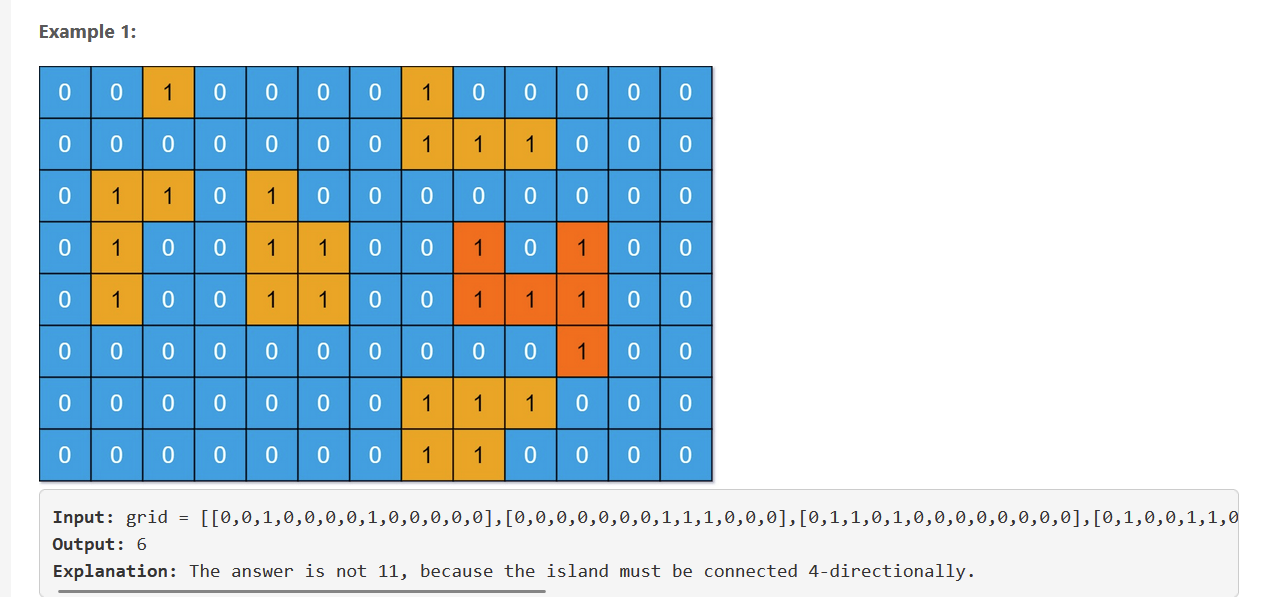

In [ ]:
class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        
        
        def valid(row, col):
            
            return 0 <= row < m and 0 <= col < n and grid[row][col] == 1
                
        
        
        def dfs(row,col):
            ans = 1
            for dx, dy in directions:
                
                #notice why are we adding dy to row and dx to col
                next_row, next_col = row + dy, col + dx
                
                #very important step to terminate recursion
                if valid(next_row, next_col) and (next_row, next_col) not in seen:
                    seen.add((next_row, next_col))
                    #think why this becomes important
                    ans += dfs(next_row, next_col)
                    
            return(ans)
                
            
        
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        
        seen = set()
        ans = [0]
        
        m = len(grid)
        n = len(grid[0])
        
        
        for row in range(m):
            for col in range(n):
                #if you dont add grid[row][col] == 1 then ans = mxn
                if grid[row][col] == 1 and (row, col) not in seen:
                    seen.add((row, col))
                    ans.append(dfs(row, col))
        
        return(max(ans))

#### Reachable Nodes With Restrictions

There is an undirected tree with n nodes labeled from 0 to n - 1 and n - 1 edges.

You are given a 2D integer array edges of length n - 1 where edges[i] = [ai, bi] indicates that there is an edge between nodes ai and bi in the tree. You are also given an integer array restricted which represents restricted nodes.

Return the maximum number of nodes you can reach from node 0 without visiting a restricted node.

Note that node 0 will not be a restricted node.

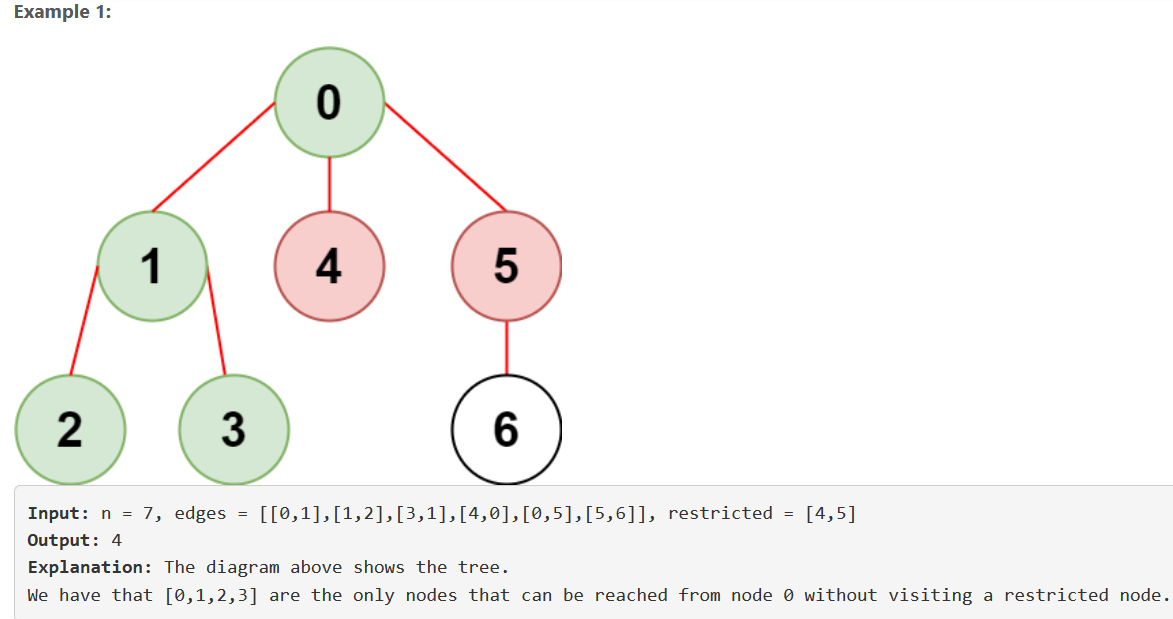

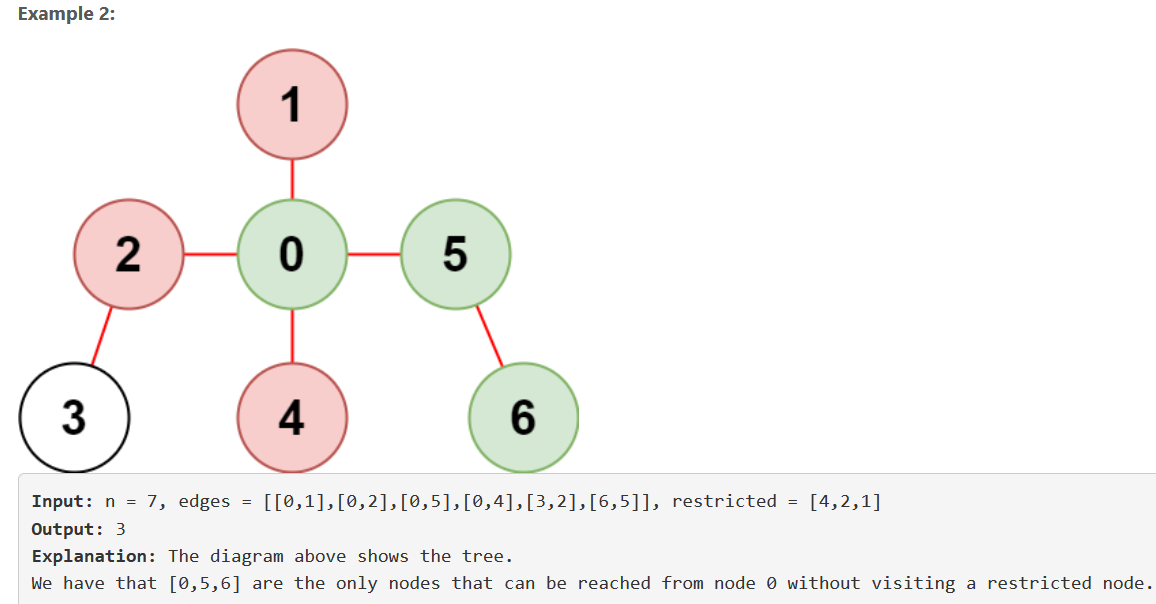

In [ ]:
class Solution:
    def reachableNodes(self, n: int, edges: List[List[int]], restricted: List[int]) -> int: